In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import median 

In [2]:
df = pd.read_csv('../output/status_sources.csv')
df.head()

,SERVICE,NOTE,SELF_STATUS_PAGE,SELF_STATUS_SOURCE,USER_SOURCES,ALEXA_POS,MOZ_POS,RANKRANGER_POS,AHREFS_POS,SIMILARWEB_ALL,SIMILARWEB_POS_CAT
0,Lyft,NaN,N,-,"0,1,2,3",NaN,NaN,NaN,NaN,NaN,"46 Travel-And-Tourism,Health"
1,Facebook Messenger,NaN,Y,facebook,"0,4,5,3,6,1",NaN,NaN,NaN,NaN,NaN,NaN
2,Trello,NaN,Y,statuspage,"0,7,5,3",NaN,NaN,NaN,NaN,NaN,NaN
3,Netflix,NaN,Y,netflix,"0,5,4,10,1,9",20.0,195.0,30.0,14.0,16.0,2 Arts-And-Entertainment
4,Facebook,NaN,Y,facebook,"0,7,10,5,4,3,1",6.0,31.0,2.0,2.0,3.0,2 Computers-Electronics-And-Technology


### Third-party sources of information (all services)

In [3]:
# count occurrences of third-party sources (tps) for all services
# Google query (1st page): <SERVICE> service status
tps_counts = {}
for sources in df['USER_SOURCES']:
    try: # some do not have user-sources of data
        for tps in sources.split(','):
            if tps not in tps_counts.keys():
                tps_counts.update({tps : 1})
            else:
                tps_counts[tps] += 1
    except:
        pass
print(tps_counts)

{'0': 35, '1': 16, '2': 6, '3': 15, '4': 19, '5': 33, '6': 1, '7': 11, '10': 14, '9': 1, '11': 5, '13': 2, '14': 2, '15': 1, '16': 2, '17': 1, '18': 1}


In [4]:
# update the key names to the actual third party source
new_keys = [['Downdetector','0'],['ServicesDown','1'],['UpDownRadar','2'],['Outage.Report','3'],['IsTheServiceDown','4'],['IsItDownRightNow','5'],['DownHunter','6'],['StatusGator','7'],['NetflixDown','9'],['DownRightNow','10'],['DownForEveryoneOrJustMe','11'],['IsDown.app','13'],['Uptime','14'],['UpDownReport','15'],['Cloudharmony','16'],['DownInspector','17'],['Statusticker','18']]
for entry in new_keys:
    tps_counts[entry[0]] = tps_counts.pop(entry[1])
tps_counts = dict(sorted(tps_counts.items(), key=lambda item: item[1], reverse=True))
print(tps_counts)
print('mean:', sum(tps_counts.values()) / len(tps_counts))

{'Downdetector': 35, 'IsItDownRightNow': 33, 'IsTheServiceDown': 19, 'ServicesDown': 16, 'Outage.Report': 15, 'DownRightNow': 14, 'StatusGator': 11, 'UpDownRadar': 6, 'DownForEveryoneOrJustMe': 5, 'IsDown.app': 2, 'Uptime': 2, 'Cloudharmony': 2, 'DownHunter': 1, 'NetflixDown': 1, 'UpDownReport': 1, 'DownInspector': 1, 'Statusticker': 1}
mean: 9.705882352941176


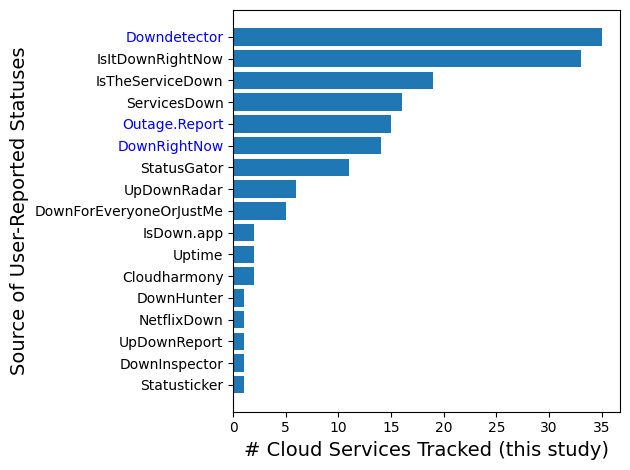

In [5]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(range(len(tps_counts)), list(tps_counts.values()), align='center')
plt.yticks(range(len(tps_counts)), list(tps_counts.keys()))
ax.invert_yaxis()
ax.get_yticklabels()[0].set_color("blue")
ax.get_yticklabels()[4].set_color("blue")
ax.get_yticklabels()[5].set_color("blue")
# plt.title("Third-Party Website Tracking for All Services")
plt.xlabel("# Cloud Services Tracked (this study)", size=14)
plt.ylabel("Source of User-Reported Statuses", size=14)
plt.tight_layout()
plt.show()
# fig.savefig('../output/plots/tps_all.pdf', dpi=fig.dpi)

### Third-party sources of information (individual services)

In [6]:
# count the number of third-party sources for each service
tps_per_service = {}
sources = df['USER_SOURCES'].values
for num, service in enumerate(df['SERVICE']):
    try: # some do not have user-sources of data
        tps_per_service.update({service : len(sources[num].split(','))})
    except:
        pass
tps_per_service = dict(sorted(tps_per_service.items(), key=lambda item: item[1], reverse=True))
print(len(tps_per_service), tps_per_service)

40 {'Facebook': 7, 'Facebook Messenger': 6, 'Netflix': 6, 'Twitter': 6, 'Yahoo! Mail': 6, 'Spotify': 6, 'Pinterest': 6, 'Paypal': 5, 'LinkedIn': 5, 'WhatsApp': 5, 'Zynga': 5, 'YouTube': 5, 'Gmail': 5, 'Amazon': 5, 'Instagram': 5, 'Lyft': 4, 'Trello': 4, 'Reddit': 4, 'Hotmail': 4, 'Ning': 4, 'Blogger': 4, 'Snapchat': 4, 'Typepad': 4, 'Skype': 4, 'Airbnb': 4, 'LiveJournal': 4, 'Cloudflare': 4, 'Nintendo': 4, 'Bitbucket': 3, 'Confluence': 3, 'Github': 3, 'Tumblr': 3, 'Foursquare': 3, 'Jira': 3, 'Minecraft': 3, 'Google': 3, 'Opsgenie': 2, 'Slack': 2, 'Apple': 1, 'Microsoft Azure': 1}


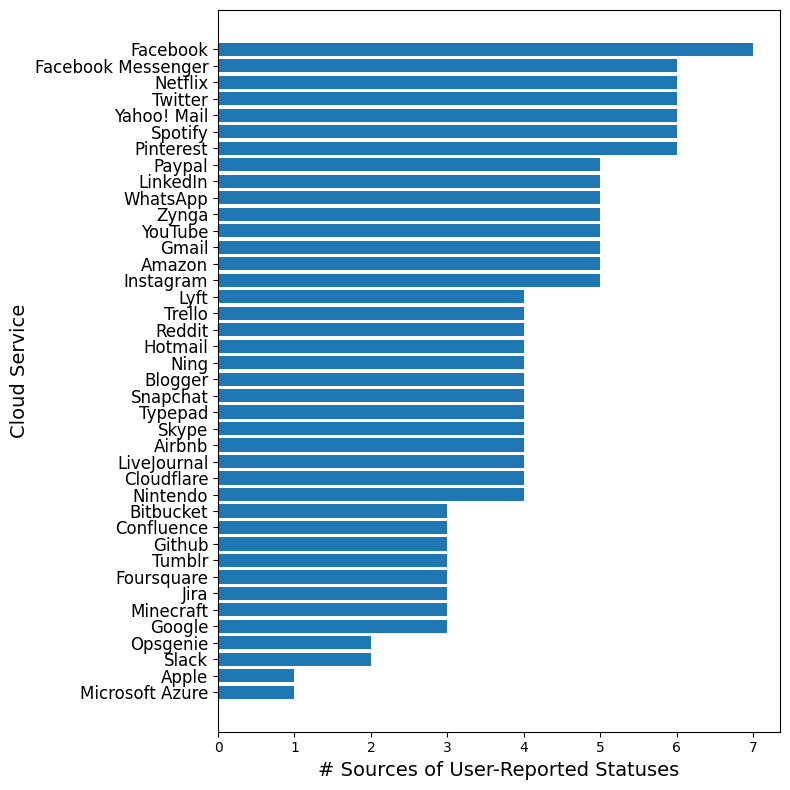

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)
ax.barh(range(len(tps_per_service)), list(tps_per_service.values()), align='center')
plt.yticks(range(len(tps_per_service)), list(tps_per_service.keys()))
plt.tick_params(axis='y', which='major', labelsize=12)
ax.invert_yaxis()
# plt.title("Third-Party Website Tracking for Individual Services")
plt.xlabel("# Sources of User-Reported Statuses", size=14)
plt.ylabel("Cloud Service", size=14)
plt.tight_layout()
plt.show()
# fig.savefig('../output/plots/tps_individual_resized.pdf', dpi=fig.dpi)

### Website rankings

In [8]:
df_ranks = df.iloc[:, 5:10].copy()
before = len(df_ranks)
df_ranks = df_ranks.set_index(df['SERVICE'])
df_ranks.columns = ['Alexa Top 50', 'Moz Top 500', 'RankRanger Top 100', 'Ahrefs Top 100', 'SimilarWeb Top 50']
df_ranks.dropna(how='all', inplace=True)
df_ranks = df_ranks.sort_values(by=['SERVICE'], ascending=True)
after = len(df_ranks)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_ranks.head()

Total services: 46
Services with ranking: 25
% Services with ranking: 54.347826086956516


,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
Airbnb,NaN,376.0,NaN,NaN,NaN
Amazon,11.0,25.0,3.0,6.0,13.0
Apple,NaN,3.0,6.0,23.0,NaN
Blogger,NaN,7.0,NaN,NaN,NaN
Cloudflare,NaN,4.0,NaN,NaN,NaN


<ipython-input-30-a1b336bb98dc>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


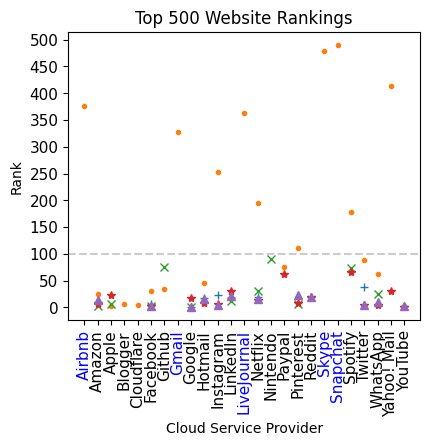

In [30]:
df_ranks.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_ranks.index)), df_ranks.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
ax.yaxis.set_ticks(np.arange(0, 510, 50))
ax.get_xticklabels()[0].set_color("blue")
ax.get_xticklabels()[7].set_color("blue")
ax.get_xticklabels()[12].set_color("blue")
ax.get_xticklabels()[18].set_color("blue")
ax.get_xticklabels()[19].set_color("blue")
plt.axhline(y=100, color='black', alpha=0.2, linestyle='--')
plt.title("Top 500 Website Rankings")
plt.xlabel("Cloud Service Provider")
plt.ylabel("Rank")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.subplots_adjust(left=0.1, right=.65, bottom=0.3, top=0.9)
# plt.savefig('../output/plots/top_500_resized.pdf', dpi=fig.dpi, bbox_inches='tight')
plt.show()

In [10]:
# lets plot only the top 100's
df_100 = df_ranks.apply(lambda x: [y if y <= 100 else np.nan for y in x])
df_100.dropna(how='all', inplace=True)
df_100 = df_100.sort_values(by=['SERVICE'], ascending=True)
after = len(df_100)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_100.head()

Total services: 46
Services with ranking: 20
% Services with ranking: 43.47826086956522


,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
Amazon,11.0,25.0,3.0,6.0,13.0
Apple,NaN,3.0,6.0,23.0,NaN
Blogger,NaN,7.0,NaN,NaN,NaN
Cloudflare,NaN,4.0,NaN,NaN,NaN
Facebook,6.0,31.0,2.0,2.0,3.0


<ipython-input-11-54e33c8590e9>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


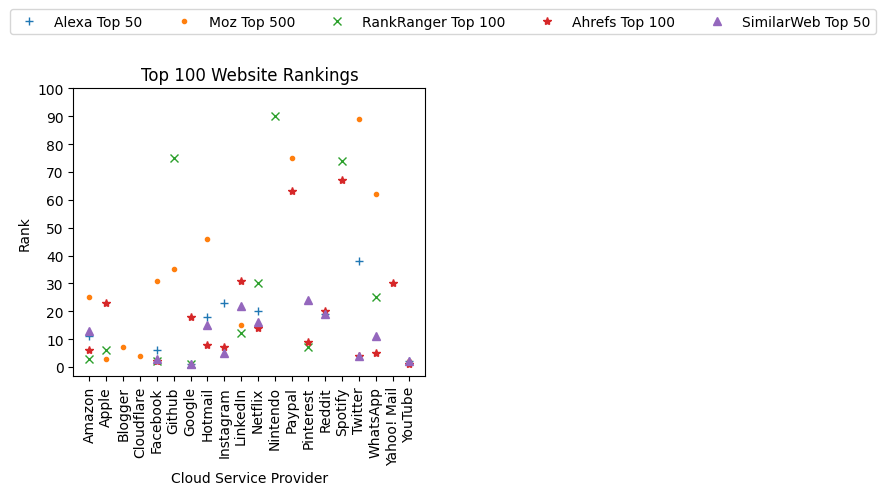

In [11]:
df_100.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_100.index)), df_100.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper left', bbox_to_anchor=(-.2, 1.3), ncol=5)
ax.yaxis.set_ticks(np.arange(0, 110, 10))
plt.title("Top 100 Website Rankings")
plt.xlabel("Cloud Service Provider")
plt.ylabel("Rank")
plt.subplots_adjust(left=0.1, right=.65, bottom=0.3, top=0.9)
# plt.savefig('../output/plots/top_100_resized.pdf', dpi=fig.dpi, bbox_inches='tight')
plt.show()

In [12]:
# lets plot only the top 100-500
df_50 = df_ranks.apply(lambda x: [y if y >= 100 else np.nan for y in x])
df_50.dropna(how='all', inplace=True)
df_50 = df_50.sort_values(by=['SERVICE'], ascending=True)
after = len(df_50)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_50.head()

Total services: 46
Services with ranking: 10
% Services with ranking: 21.73913043478261


,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
Airbnb,NaN,376.0,NaN,NaN,NaN
Gmail,NaN,328.0,NaN,NaN,NaN
Instagram,NaN,252.0,NaN,NaN,NaN
LiveJournal,NaN,363.0,NaN,NaN,NaN
Netflix,NaN,195.0,NaN,NaN,NaN


<ipython-input-13-a4f575efdd03>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


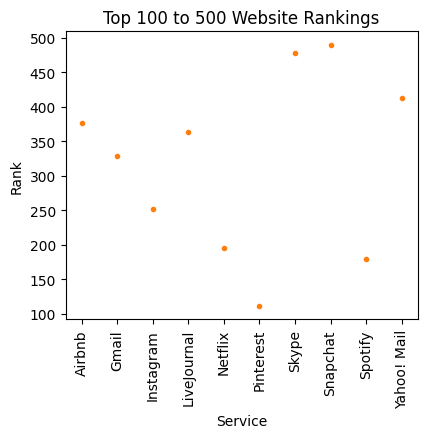

In [13]:
df_50.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_50.index)), df_50.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
plt.title("Top 100 to 500 Website Rankings")
plt.xlabel("Service")
plt.ylabel("Rank")
plt.subplots_adjust(left=0.1, right=.65, bottom=0.3, top=0.9)
# plt.savefig('../output/plots/top_50.png', dpi=fig.dpi)
plt.show()

### Website ranking per category

In [14]:
# TODO: cleanup --> this is a bit hacky
df_category = pd.DataFrame()
df_category['SERVICE'] = df['SERVICE'].copy()

rank_cat1 = np.array(df['SIMILARWEB_POS_CAT'].copy())
rank = []
cat = []
for entry in rank_cat1:
    if entry is not np.nan:
        rank.append(entry.split()[0])
        cat.append(entry.split()[1])
    else:
        rank.append(np.nan)
        cat.append(np.nan)
df_category['RANK'] = rank
df_category['CATEGORY'] = cat

df_category = df_category[df_category['RANK'].notna()]
df_category.RANK = df_category.RANK.astype(int)
df_category = df_category.sort_values(by=['CATEGORY','RANK'], ascending=True)
after = len(df_category)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_category.head(after)

Total services: 46
Services with ranking: 21
% Services with ranking: 45.65217391304348


,SERVICE,RANK,CATEGORY
25,YouTube,1,Arts-And-Entertainment
3,Netflix,2,Arts-And-Entertainment
28,Spotify,7,Arts-And-Entertainment
38,Google,1,Computers-Electronics-And-Technology
4,Facebook,2,Computers-Electronics-And-Technology
16,Twitter,3,Computers-Electronics-And-Technology
33,Instagram,4,Computers-Electronics-And-Technology
17,WhatsApp,7,Computers-Electronics-And-Technology
6,Hotmail,9,Computers-Electronics-And-Technology
5,Reddit,10,Computers-Electronics-And-Technology


In [15]:
# this latex has since been modified (see next cell)...
print(df_category.to_latex(index=False))

\begin{tabular}{lrl}
\toprule
   SERVICE &  RANK &                              CATEGORY \\
\midrule
   YouTube &     1 &                Arts-And-Entertainment \\
   Netflix &     2 &                Arts-And-Entertainment \\
   Spotify &     7 &                Arts-And-Entertainment \\
    Google &     1 &  Computers-Electronics-And-Technology \\
  Facebook &     2 &  Computers-Electronics-And-Technology \\
   Twitter &     3 &  Computers-Electronics-And-Technology \\
 Instagram &     4 &  Computers-Electronics-And-Technology \\
  WhatsApp &     7 &  Computers-Electronics-And-Technology \\
   Hotmail &     9 &  Computers-Electronics-And-Technology \\
    Reddit &    10 &  Computers-Electronics-And-Technology \\
  LinkedIn &    13 &  Computers-Electronics-And-Technology \\
 Pinterest &    15 &  Computers-Electronics-And-Technology \\
     Apple &    31 &  Computers-Electronics-And-Technology \\
    Github &    34 &  Computers-Electronics-And-Technology \\
    Tumblr &    42 &  Computers

The modified LaTeX:

\begin{table}[h]
    \centering
    \begin{tabular}{@{}|l|lc|@{}}
    \toprule
    \textbf{Category}                                               & \textbf{Service}       & \textbf{Rank} \\ \toprule
    \multirow{3}{*}{Arts and Entertainment}                & youtube       & 1    \\  
                                                           & netflix       & 2    \\  
                                                           & spotify       & 7    \\ \midrule
    \multirow{11}{*}{\begin{tabular}[c]{@{}l@{}}Computers, Electronics \\ and Technology\end{tabular}} & facebook      & 2    \\  
                                                           & twitter       & 3    \\  
                                                           & instagram     & 4    \\  
                                                           & whatsapp      & 7    \\  
                                                           & hotmail       & 9    \\  
                                                           & reddit        & 10   \\  
                                                           & linkedin      & 13   \\  
                                                           & pinterest     & 15   \\  
                                                           & apple-servers & 31   \\  
                                                           & github        & 34   \\  
                                                           & tumblr        & 42   \\ \midrule
    E-Commerce and Shopping                                & amazon        & 1    \\ \midrule
    Finance                                                & paypal        & 1    \\ \midrule
    \multirow{2}{*}{Travel and Tourism, Health}             & airbnb        & 4    \\  
                                                           & lyft          & 46   \\ \bottomrule
    \end{tabular}
    \captionsetup{justification=centering}
    \caption{Ranking of services per category based on website traffic as of 01 April 2021. \\ (source: https://www.similarweb.com/top-websites)}
\end{table}